In [2]:
# Reference: https://jupyterbook.org/interactive/hiding.html
# Use {hide, remove}-{input, output, cell} tags to hiding content

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
#pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

In [11]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio

# set up plotly defaults
pio.renderers.default = "plotly_mimetype+svg"
pio.templates["book"] = go.layout.Template(
    layout=dict(
        margin=dict(l=10, r=10, t=10, b=10),
        autosize=True,
        width=350,
        height=250,
        xaxis=dict(showgrid=True),
        yaxis=dict(showgrid=True),
        title=dict(x=0.5, xanchor="center"),
    )
)
pio.templates.default = "simple_white+book"

def margin(fig, **kwargs):
    """Set margins for a plotly figure"""
    return fig.update_layout(margin=kwargs)

# Exercises

- Write a SQL query on the `baby` relation, read the result into a `pandas`
  dataframe, and create a plot of how popular your name was over time. If you
  used that plot to make a guess at your age, what would you guess? Is that
  close to your actual age? Think of a potential reason.

### My solution

In [4]:
import sqlalchemy

In [7]:
db = sqlalchemy.create_engine('sqlite:///data/babynames.db')

In [13]:
#Plot of how popular "Shirley" is over time
query='''
SELECT *
FROM baby
WHERE Name = "Shirley"
  AND Sex = "F";
'''
Shirley = pd.read_sql(query,db)
Shirley

,Name,Sex,Count,Year
0,Shirley,F,135,2020
1,Shirley,F,147,2019
2,Shirley,F,152,2018
...,...,...,...,...
137,Shirley,F,18,1883
138,Shirley,F,9,1882
139,Shirley,F,8,1880


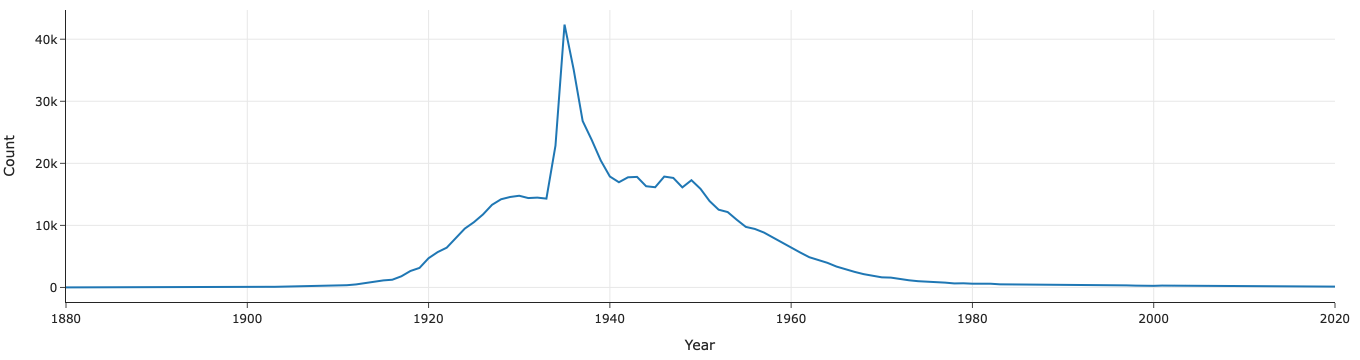

In [14]:
px.line(Shirley, x='Year', y='Count', width=350, height=250)

I would guess from this chart that anyone with my name is from the 1940s.

- When plotting male and female baby names over time, you might notice that
  after 1950 there are generally more male babies. Is this trend reflected in
  the U.S. census data? Go to the Census website
  (https://data.census.gov/cedsci/) and check.